##### QTimer 定時器
QTimer 是 PyQt5 裡的處理時間的一個非常重要的方法，由於透過 PyQt5 產生視窗介面時，所有功能等同被封裝在一個「迴圈」裡，\
如果需要在迴圈中處理「定時執行某件事」，就需要使用 QTimer 定時器的功能，這篇教學會介紹如何在 PyQt5 視窗裡使用 QTimer 定時器，\
並透過定時器做出一些簡單的應用。

##### 使用 QTimer 定時器 
載入 QtCore 模組，就能開始使用 QTimer 方法，基本的操作流程如下：
* 使用 QtCore.QTimer() 加入定時器。
* 使用 timeout.connect(fn) 設定定時要啟用的 function。
* 使用 start(ms) 啟用定時器，設定間隔毫秒數。
* 使用 stop() 停止定時器。

以下方的程式碼為例，程式執行後，畫面中會以每格 0.5 秒 ( 500 毫秒 ) 的間隔，將數字不斷往上累加。

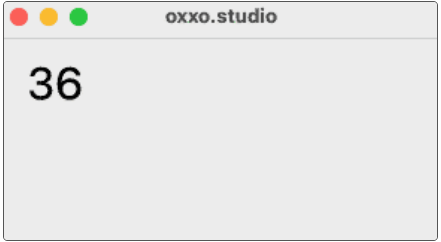

In [ ]:
from PyQt5 import QtWidgets, QtCore
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label = QtWidgets.QLabel(Form)          # 加入 QLabel 顯示數字
label.setGeometry(20,10,100,40)
label.setStyleSheet('font-size:30px;')

a = 0
def count():
    global a
    a = a + 1                  # 數字增加 1
    label.setText(str(a))      # QLabel 顯示數字

timer = QtCore.QTimer()        # 加入定時器
timer.timeout.connect(count)   # 設定定時要執行的 function
timer.start(500)               # 啟用定時器，設定間隔時間為 500 毫秒

Form.show()
sys.exit(app.exec_())

##### 按鈕控制定時器 
了解 QTimer 的用法後，就可以透過按鈕的方式控制定時器，下方的程式碼執行後，畫面中會有三顆按鈕，分別負責啟用\
start、暫停 pause 和重設 reset，點擊按鈕後就可以看見累加的數字變化。

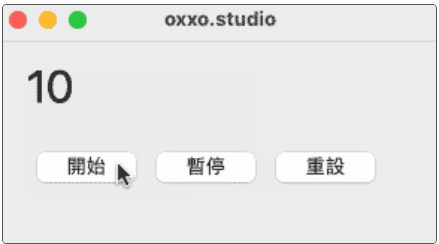

In [ ]:
from PyQt5 import QtWidgets, QtCore
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label = QtWidgets.QLabel(Form)
label.setGeometry(20,10,100,40)
label.setStyleSheet('font-size:30px;')
label.setText('0')

a = 0
def count():
    global a
    a = a + 1
    label.setText(str(a))

timer = QtCore.QTimer()
timer.timeout.connect(count)

def start():
    timer.start(1000)          # 啟用定時器(ms)

def pause():
    timer.stop()              # 停止定時器

def reset():
    global a
    a = 0                     # 數值歸零
    label.setText('0')
    timer.stop()              # 停止定時器

btn_start = QtWidgets.QPushButton(Form)
btn_start.setText('開始')
btn_start.setGeometry(20,70,80,30)
btn_start.clicked.connect(start)          # 點擊按鈕執行 start()

btn_pause = QtWidgets.QPushButton(Form)
btn_pause.setText('暫停')
btn_pause.setGeometry(100,70,80,30)
btn_pause.clicked.connect(pause)          # 點擊按鈕執行 pause()

btn_reset = QtWidgets.QPushButton(Form)
btn_reset.setText('重設')
btn_reset.setGeometry(180,70,80,30)
btn_reset.clicked.connect(reset)          # 點擊按鈕執行 reset()

Form.show()
sys.exit(app.exec_())

##### 改用 class 的寫法 
上方的程式碼，亦可改用 class 的寫法表示。

In [ ]:
# 從 PyQt5 包中導入 QtWidgets 和 QtCore 模組。QtWidgets 包含 GUI 元件，QtCore 包含核心的非 GUI 功能。
from PyQt5 import QtWidgets, QtCore
# 導入 sys 模組，用於 Python 腳本與 Python 解釋器的交互。
import sys

# 定義一個 MyWidget 類，繼承自 QtWidgets.QWidget，是所有用戶界面對象的基類。
class MyWidget(QtWidgets.QWidget):
    # 類的初始化方法。
    def __init__(self):
        # 調用父類的初始化方法。
        super().__init__()
        # 設置窗口的標題。
        self.setWindowTitle('oxxo.studio')
        # 設置窗口的大小。
        self.resize(300, 200)
        # 初始化計數變量 a。
        self.a = 0
        # 創建一個 QTimer 對象。
        self.timer = QtCore.QTimer()
        # 將 QTimer 的 timeout 信號連接到 count 方法，當計時器超時時調用。
        self.timer.timeout.connect(self.count)
        # 調用 ui 方法來初始化用戶界面元件。
        self.ui()

    # 用於設置界面元件的方法。
    def ui(self):
        # 創建一個 QLabel 對象來顯示計數值。
        self.label = QtWidgets.QLabel(self)
        # 設置標籤的幾何位置和大小。
        self.label.setGeometry(20, 10, 100, 40)
        # 設置標籤的 CSS 樣式。
        self.label.setStyleSheet('font-size:30px;')
        # 初始化標籤顯示的文字。
        self.label.setText('0')

        # 創建一個 QPushButton 對象作為開始按鈕。
        self.btn_start = QtWidgets.QPushButton(self)
        self.btn_start.setText('開始')
        self.btn_start.setGeometry(20, 70, 80, 30)
        # 連接開始按鈕的點擊事件到 start 方法。
        self.btn_start.clicked.connect(self.start)

        # 創建一個 QPushButton 對象作為暫停按鈕。
        self.btn_pause = QtWidgets.QPushButton(self)
        self.btn_pause.setText('暫停')
        self.btn_pause.setGeometry(100, 70, 80, 30)
        # 連接暫停按鈕的點擊事件到 pause 方法。
        self.btn_pause.clicked.connect(self.pause)

        # 創建一個 QPushButton 對象作為重設按鈕。
        self.btn_reset = QtWidgets.QPushButton(self)
        self.btn_reset.setText('重設')
        self.btn_reset.setGeometry(180, 70, 80, 30)
        # 連接重設按鈕的點擊事件到 reset 方法。
        self.btn_reset.clicked.connect(self.reset)

    # 定義 count 方法，每次 QTimer 超時時調用，用於更新標籤顯示的計數值。
    def count(self):
        self.a += 1  # 增加計數值。
        self.label.setText(str(self.a))  # 更新標籤的顯示。

    # 定義 start 方法，開始計時器。
    def start(self):
        self.timer.start(500)  # 設置計時器間隔為 500 毫秒並啟動。

    # 定義 pause 方法，暫停計時器。
    def pause(self):
        self.timer.stop()  # 停止計時器。

    # 定義 reset 方法，重設計時器和計數值。
    def reset(self):
        self.a = 0  # 重設計數值。
        self.label.setText('0')  # 更新標籤顯示為 0。
        self.timer.stop()  # 停止計時器。

# 檢查此腳本是否作為主程序運行。
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)  # 創建應用程序實例。
    Form = MyWidget()  # 實例化 MyWidget。
    Form.show()  # 顯示窗口。
    sys.exit(app.exec_())  # 開始事件循環，等待退出。